<a href="https://colab.research.google.com/github/ttya16/ArtificialNeuralNetwork/blob/master/ArtificialNeuralNetwork_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 人工ニューラルネット

・人工ニューラルネットの考えは古くからあり、初めて考案されたのは1943年"A Logical Calculus of Ideas Immanent in Nervous Activity"(W. McCulloch & W. Pitts)によるもの。

・動物の脳の神経が共同作業で命題論理を駆使して複雑な計算を実行している仕組みをシンプルにしたモデル。

・過去に2度注目される時代があったが、当時は期待された程の性能を発揮できなかったことや、他の機械学習モデルの方が優秀だったこともありなかなか陽の目を見ることがなかった。

・現在ニューラルネットは3度目のブームを迎えているが、果たして長続きするのか？

→以下の理由により今回は長続きしそうである


1.   ニューラルネットの学習に必要なデータが膨大に存在する。
2.   計算機の性能向上により、大規模なニューラルネットを合理的な時間内に学習させられるようになった。
3.   学習アルゴリズムの改良もされ続けており、地味だが大きく貢献している。
4.   ニューラルネットの理論限界は実務上はほぼ無害に等しいことが明らかになった。（局所最適解に陥りやすい問題とかあったが、実際にはそうなるのは稀であるし、その局所最適解も全体の最適解にかなり近いものであることがほとんどであるらしい）
5.  ブームがきて、資金調達→設備投資などの環境改善→より性能の良い製品→更に関心を産み、新たに資金調達できる　といった良い循環に入ってきている。



※McCulloch & Pittsの提案したモデルは、1個以上のバイナリ入力（0 or 1）と1個のバイナリ出力を持ち、論理演算AND、OR、NOTと恒等写像を組み合わせて様々な論理演算を計算できる。





## パーセプトロン
・最も単純な人工ニューロンで、1957年フランク・ローゼンブラット氏によって考案された。

・LTU(線形閾値素子)と呼ばれるものが構成素子となっている。

・入力はバイナリではなく数値で、重みづけされた後にステップ関数を適用して結果を出力する。


In [0]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

iris = load_iris()
X = iris.data[:, (2, 3)] #petal length & width
y = (iris.target == 0).astype(np.int) #setona or not setona

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
per_clf = Perceptron(random_state=42)
per_clf.fit(X_train, y_train)

y_pred = per_clf.predict(X_test)
print(f1_score(y_test, y_pred))


(120, 2)
1.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [0]:
#kerasによる実装
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(2, input_dim=2, kernel_initializer='random_uniform'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


## MLP & BackPropagation
### MLP
・パーセプトロンは有能に思えたが、ごく単純な問題（例えばXORなど）を解決できないなどの問題もあった。

・この問題は複数のパーセプトロンを重ねることによって対応できることが判明した。これを多層パーセプトロン（Multi-Layer Perceptron, MLP）と呼ぶ。

・入力層と出力層の間の層は隠れ層と呼ばれる。複数の隠れ層をもつニューラルネットワークを、
深層ニューラルネットワーク(Deep Neural Network, DNN)という。


### BackPropagation
・MLPの学習方法については長年模索が続いたが、1986年にD. RumelhartらによりBackPropagation(誤差逆伝播法)というアルゴリズムが考案された。

・リバースモード自動微分を用いた勾配急下法と直感的に考えてもらって良い。

・BackPropagatioinは何をしているか

1.   学習データがネットワークに与えられて、各層におけるニューロンの出力を計算する。
（前進パス、ForwardProp）
2.   ネットワークの出力誤差を計算し、出力層から今度はネットワークを逆に辿りながら隠れ層のニューロンの出力結果が誤差にどの程度影響を与えたか(誤差勾配)を計算する。
3.    入力層まで達したら、誤差を小さくするように2.で計算した誤差勾配に基づいて各層の重みを調整する。



## 活性化関数の導入
・BackPropagationをうまく動かすために、今までステップ関数を適用していたのを別の活性化関数に置き換えた。

・ステップ関数は微分不可能なので勾配の計算には向かない。

・代わりに導入したのがシグモイド関数と呼ばれるもの。

・他にも有効な活性化関数として双曲線正接（hyperbolic tangent, tanh）やReLUがある

###なぜ活性化関数？
・活性化関数なしのNNはどれだけ多層にしたとて、表現力は1層のNNと変わらない。

・1層のネットワークは線形モデルなので、単純にそれを多層にしたところであまり意味はない。

・活性化関数を通して、ネットワークに非線形性を与える。


### 万能近似定理 Universal Approximation Theorem

定数でない連続な有界単調増加な関数を隠れ層の出力に使った3層以上のニューラルネットワークは、任意の連続関数を任意の精度で表現可能である。


簡単に言うと、非線形な隠れユニットを使用していれば3層のネットワークで大体の問題は解けるということ。

※隠れ層のユニット数が指数的に大きくなるし、学習できる保障もない

In [0]:
import numpy as np
#sigmoid
def sigmoid(x):
  return 1./(1. + np.exp(-x))


#tanh
def tanh(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
#np.tanh(x)

#ReLU
def relu(x):
  return np.maximum(0, x)


#softmax
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x))


x = np.array([-0.5, 0.0, 0.5])

print('sigmoid:',sigmoid(x))
print('tanh:', tanh(x))
print('ReLU:', relu(x))

sigmoid: [0.37754067 0.5        0.62245933]
tanh: [-0.46211716  0.          0.46211716]
ReLU: [0.  0.  0.5]


・MLPは個々の出力がバイナリになるため、分類問題に適していると言える。

・複数クラスの中からの分類をするときは、出力層の活性化関数をsoftmax関数にすれば良い。

・信号の流れが入力層→出力層の一方通行になっているが、

このようなアーキテクチャのネットワークを**順伝播型ネットワーク（Feedforward neural network, FNN）**と呼ぶ。

In [0]:
#２層の順伝播型ネットワークの実装 from scratch
import numpy as np

#Sigmoid layer
class Sigmoid:
  def __init__(self):
    self.params=[]
    
  def forward(self, x):
    return sigmoid(x)

#FC layer
class Affine:
  def __init__(self, W, b):
    self.params = [W, b]
    
  def forward(self, x):
    W, b = self.params
    return np.dot(x, W) + b

  
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size):
    I, H, O = input_size, hidden_size, output_size
    
    #initialize parameters(W and b)
    W1 = np.random.randn(I, H)
    b1 = np.random.randn(H)
    W2 = np.random.randn(H, O)
    b2 = np.random.randn(O)
    
    #create model layers in a list
    self.layers =[
        Affine(W1, b1),
        Sigmoid(),
        Affine(W2, b2)
    ]
    
    #save parameters of every layer in a list
    self.params=[]
    for layer in self.layers:
      self.params += layer.params
      
  def predict(self, X):
    for layer in self.layers:
      X = layer.forward(X)
    return X
    
    

In [0]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
y = model.predict(x)
print(x[0])
print(y[0])

[-0.90503698  0.96045752]
[ 0.54018827 -0.18485194 -1.94234724]


In [0]:
#MNIST
from __future__ import print_function

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

np.random.seed(1671) #for reproductivity

NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2

(X_train, y_train), (X_test, y_test) = mnist.load_data()
RESHAPED = 28 * 28

print(X_train.shape)
print(X_test.shape)


Instructions for updating:
Colocations handled automatically by placer.
11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [0]:
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#normalize
X_train /= 255.
X_test /= 255.

#to_categorical
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [0]:
model = Sequential()
model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
#compile時に損失関数、optimizerを指定
model.compile(optimizer = 'sgd', loss='categorical_crossentropy', metrics=['accuracy'])

## ニューラルネットワークのハイパーパラメータ
・NNはあらゆるネットワークトポロジー（ニューロンの接続方法）が利用でき、層の数やニューロンの数、活性化関数のタイプ、重みの初期化方法等、色々な設定項目がある。

・NNは設定項目が多い＝柔軟性が高いのがメリットではあるが、逆にあらゆる設定項目を適切に調整するのは非常に難しいという点を考えると欠点でもある。

・グリッドサーチと交差検証では対応に時間がかかりすぎるくらいハイパーパラメータの数が多い

###隠れ層の数
・深いネットワークは浅いネットワークよりもパラメータ効率が高い（要するに深いネットワークの方が少ないニューロンで複雑なモデルを表現できる）

・ネットワークの下位層では低水準の構造（図形の一部分の線分など）、中間層では低水準構造を組み合わせた中間レベルの構造（円や四角形など）、上位層では中間レベルの構造を組み合わせた高水準な構造（顔など）をモデリングする　といったような階層構造になるため効率が良い

・未知のデータに対する汎化性能もよくなる。すでに学習済みのネットワークの下位層を似たような別のモデル用に転移して再利用することが出来てしまうため、学習の手間が大幅に省ける。

###隠れ層に含まれるニューロンの数
・入力層と出力層のニューロンの数は扱うデータとターゲットによって予め決まっているが、隠れ層のニューロンについては自由に調整できる。普通は層ごとに数が減って漏斗のような形になる。

・実際適切なニューロンの数を見つけるのは難しいので、Overfittingするまで適当にニューロン数を増やしてみるか、予め多めに設定しておいてDropoutを挟んで減らして調整する　といったような方法が考えられる。


###活性化関数
・隠れ層の活性化関数はReLUがほとんどである。（理由はなんとなくしかわかっていないが、他の活性化関数よりも計算にかかる時間が速い、かつ大きな値に大してもplateauにならない　といった利点によると考えられる）

・出力層の活性化関数はバイナリクラス分類ならsigmoid、多クラス分類ならsoftmax、回帰なら活性化関数なし（恒等写像）　とするのが通常の方法である。

# DNNの訓練
非常に深いDNNを用いてより多くの特徴量をもつデータに対して多数のクラス分類タスクを実行しなければならない　といった話になってくると、以下のような問題に直面するだろう。


*   下位層が非常に訓練しづらくなる**勾配消失**問題、または関連する**勾配爆発**問題
*   大規模ネットワークの学習時間の長さ（非常に長い）
*   パラメータの多さによる過学習の発生しやすさ

これらの問題を解決するための様々なアプローチを挙げる。



## 勾配消失/爆発　とは
DNNではBackPropagationによってコスト関数の誤差勾配を出力層から入力層まで伝えて、パラメータの更新を行う。ところが多層のネットワークでは下位層に行けば行くほど勾配が緩やかになり、勾配急下法によるパラメータの更新が十分になされない（ほとんど変化しない）。よって最適解にたどり着かないまま更新が止まってしまうという状況になってしまうのだ。この問題を**勾配消失**という。

またこれとは逆に、勾配が大きくなりすぎて各層のパラメータが更新されすぎてしまい、コスト関数の値が収束せずに発散してしまうことも起こりうる。この問題を**勾配爆発**という。

この問題は経験的に観測されていたが、詳しいことがわかったのは2010年Xavier Glorotらによる"Understanding the Difficulty of Training Deep Feedforward Neural Networks"からで、シグモイド活性化関数や重みの初期化方法に問題があるという指摘がなされた。

シグモイド関数は入力値の絶対値が大きいと1or-1で飽和して、誤差逆伝播の処理によって伝えられる勾配がほぼなくなってしまい、層が進むにつれてわずかな勾配が更に小さくなってしまい消えて行く。

## Xavierの初期値、Heの初期値
・層に出入りする信号がなくなったり、爆発したり、飽和するのは困るので、それなら入出力の信号とその勾配の分散を等しくなるようにしてやれば良いのでは？という発想

・Xavierの初期値ではシグモイド関数の場合は以下のように分散を設定して無作為に重みを初期化すると良いらしい。（詳しくは論文を読むべし）
$$
平均：0\\標準偏差：\sigma = \sqrt{\frac{2}{n_{inputs} + n_{outputs}}}\\
の正規分布
$$
または、

$$
r = \sqrt{\frac{6}{n_{inputs} + n_{outputs}}}\\
とした時の-r〜+rまでの一様分布
$$


・他の活性化関数に対してもそれぞれ初期値の設定方法が提案されており、中でもよく使うReLUに対する初期値はHeの初期値を用いると良い


・kerasだとmodel.add(Dense(kernel_initializer='.....'))
の部分で初期化法を設定することができるみたい。

## 活性化関数(ReLU, leakyReLU, ELU)
・シグモイド関数に問題があるのであれば、他に良い活性化関数を見つけなければならない。

・ReLUがはるかに優れていることがわかった。が、理論上は以下のような問題も残っている。
*   ニューロンの入力加重総和が負の値になる時、ReLUは0を出力してしまい勾配も0なので、こうなると0しか出力しなくなってしまう（実質的にニューロンが死んでしまう）。

・そのため改良版としてleaky ReLUなどの活性化関数も考案されている。
$$
LeakyReLU_\alpha(z) = max(\alpha z, z)\\
\alpha = 0.01　など
$$


・2015年にはELU(exponential linear unit)という活性化関数も考案され、ReLUよりも高い性能であることが示された。

$$
ELU_\alpha(z) = \begin{cases}
\alpha(exp(z) - 1) \quad( z<0)\\
z \quad ( z\geqq 0)\\
\end{cases}
$$

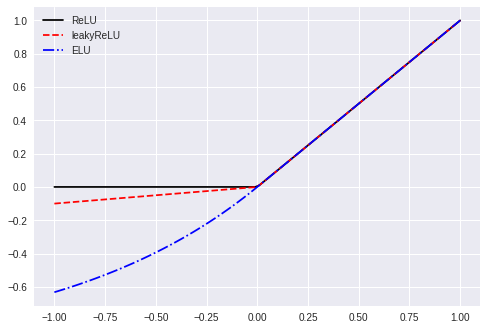

In [0]:
#ReLU, leakyReLU, ELU
import numpy as np
import matplotlib.pyplot as plt

def ReLU(z):
  return np.maximum(0, z)

def leakyReLU(z, alpha=0.01):
  return np.maximum(alpha*z, z)

def ELU(z, alpha=1):
  if z < 0:
    return alpha*(np.exp(z) - 1)
  else:
    return z


X = np.linspace(-1, 1, 100)
y_relu = [ReLU(x) for x in X]
y_leakyrelu = [leakyReLU(x, alpha=0.1) for x in X]
y_elu = [ELU(x) for x in X]

plt.plot(X, y_relu, color='k', label='ReLU')
plt.plot(X, y_leakyrelu, color='r', linestyle='dashed', label='leakyReLU')
plt.plot(X, y_elu, color='b', linestyle='dashdot', label='ELU')
plt.legend()
plt.show()

## BatchNormalization

###mini batch学習
学習データがN個あった時、N個全てを使って損失を計算して重みを更新する方法をBatch学習という。

それに対して、N個のデータからランダムにn(<N)個選び、そのn個に対して損失を計算する方法をmini batch学習という。
メリットとしては、データn個に対して損失を計算して重みを更新して行くので、その度に損失関数の形状が変わっていき、局所解に陥りにくくなる。
また、1回の計算コストもBatch学習に比べて小さいので、計算も高速化させつつ正しい解へ辿り着きやすくなることが見込まれる。


### モチベーション
He, Xavierの初期値を導入すれば学習開始時には勾配消失/爆発の問題は解消されているが、学習過程ではわからない。
2015年S.Ioffe, C.Szegedyらにより、勾配消失/爆発のみならず、学習過程で変化する各層のパラメータの影響により、各層への入力分布が変化していく問題（**内部共変量シフト**と呼ぶ）があると指摘され、その対策としてBatchNormalizationという方法が提案された。

各層において活性化関数実行直前に、入力に対して0を中心としたセンタリングと正規化を行う。



論文:[BatchNormalization](https://arxiv.org/pdf/1502.03167.pdf)

## 勾配クリッピング
・勾配降下法において、更新時に大きすぎる変化があった場合はあえて更新幅を抑えるというテクニック。勾配爆発対策。

・BatchNormalizationの方が人気だが、RNNなどではいまだに役に立つテクニックなので知っておいて損はないそう。


論文:[On the difficulty of training recurrent neural networks  R.Pascanu et al.](http://proceedings.mlr.press/v28/pascanu13.pdf)

## 転移学習(Transfer Learning)
・大規模なDNNに取り掛かるにあたって、1からモデルを構築して学習させるのも良いが、果たしてそんな時間があるのか？

・似たようなタスクをこなしているNNモデルがあれば、その下位層のネットワークを流用させてもらうということも可能で、そのほうが学習の手間が大幅に省けて良い。
これを**転移学習**という。(実装はCNNのところでやる)


Part2へ続く
DNNの訓練において、過学習を防ぐための方法や訓練の高速化のための手法を学ぶ
・DataAugmentation
・Optimizer(SGD, RMSProp, Adamなど)